# IBC Transaction Analysis

The following is an analysis of the six IBC Companies that operated on-campus at BYU-Idaho during the Spring 2016 semester. The analysis will focus on the optimal hours of operation for each company and a revenue comparison among the six companies. 

In [6]:
import pandas as pd
import plotnine as plt
from plotnine import *

# Read in the data and set the proper timezone
sales = pd.read_csv('https://byuistats.github.io/M335/data/sales.csv',
                    parse_dates=['Time'])
sales['Time'] = (sales['Time'].dt.tz_localize('UTC')
                              .dt.tz_convert('US/Mountain')
                              .dt.tz_localize(None))

Here we made some decisions about potentially outlying data. For LeBelle and Tacontento, there were two transactions that exceeded $500. As these transactions took place at the end of the semester, we deicded to discard these transactions from our analylsis as they probably represent the liquidation of company assests instead of actual company performance. 

In [7]:
# Discard outlying and 'missing' transactions
sales = sales[(sales['Amount'] < 500) & (sales['Name'] != 'Missing')]

# Aggregate the sales amounts by hour
sales['Time'] = sales['Time'].dt.floor('60min')
sales_hourly = pd.DataFrame(sales.groupby(['Name','Time'])['Amount'].sum())
sales_hourly = sales_hourly.reset_index()

# Add a column for the hour and discard the two transactions that took place
# before 5:00 AM
sales_hourly['Hour'] = sales_hourly['Time'].dt.hour
sales_hourly = sales_hourly[sales_hourly['Hour'] > 5]

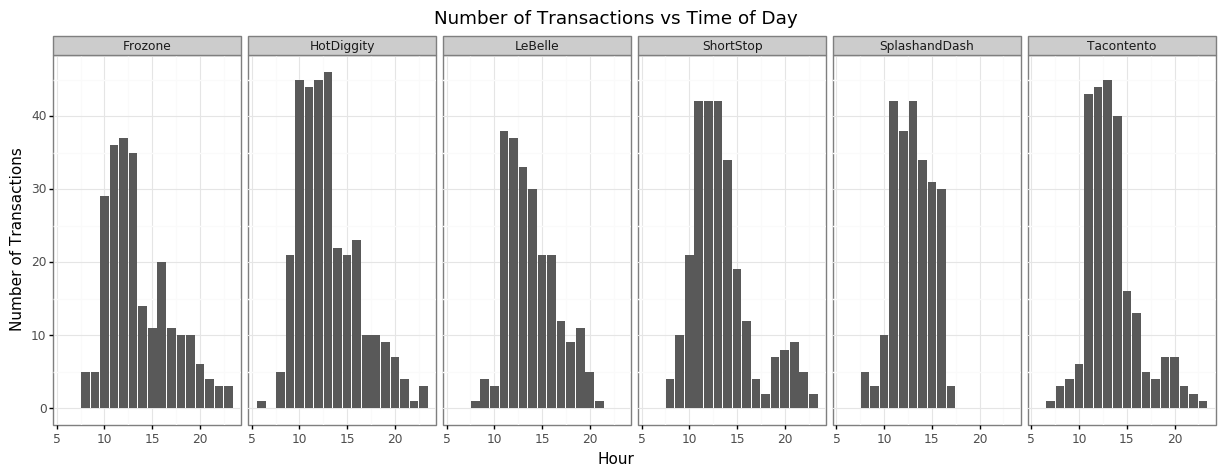

<ggplot: (-9223372036560856274)>

In [29]:
# Plot the number of transaction vs. time of day
sales_count = (pd.DataFrame(sales_hourly.groupby(['Name', 'Hour'])['Amount']
                 .count())
                 .reset_index())
(ggplot(sales_count, aes(x='Hour', y='Amount')) +
 geom_col() +
 facet_grid('. ~ Name') +
 labs(title='Number of Transactions vs Time of Day',
      y='Number of Transactions') +
 theme_bw())

This plot shows us that for each company, the bulk of all transactions took place between 10:00 AM and 3:00 PM. So, if the company decides to stay open outside these hours, the recommendation would be to decrease the number of employees on the clock. 

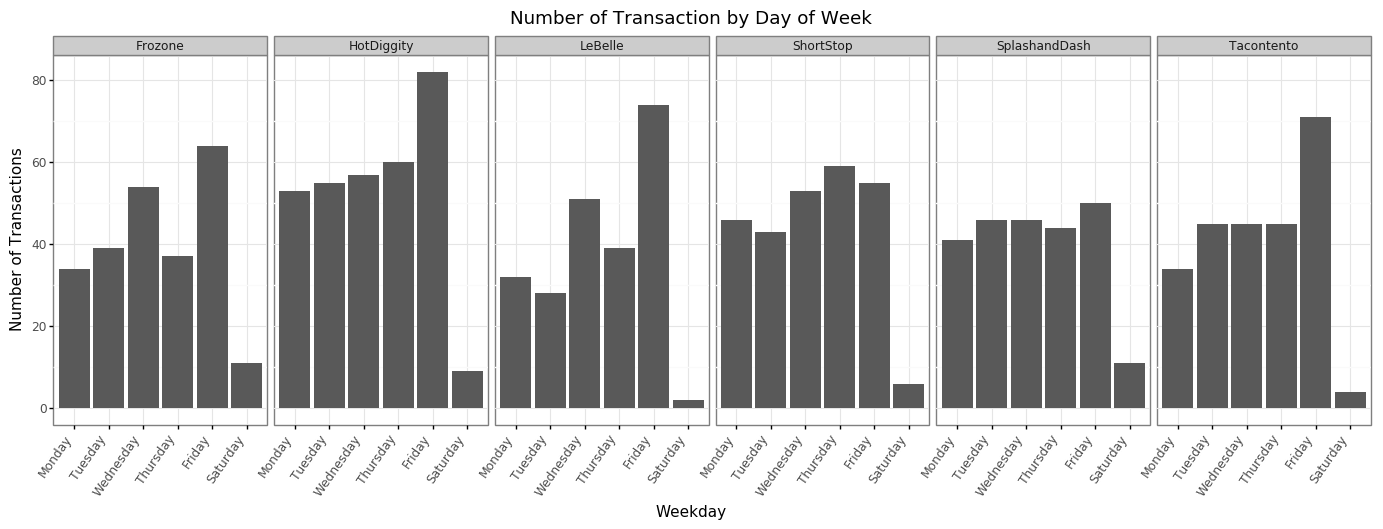

<ggplot: (-9223372036559704334)>

In [41]:
# List for ordering days of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Add column for day of week
sales_hourly['Day'] = sales_hourly['Time'].dt.weekday_name
sales_daily_count = (pd.DataFrame(sales_hourly.groupby(['Name','Day'])['Amount']
                       .count())
                       .reset_index())

# Plot sales vs day of week
plt.options.figure_size = (17, 4.8)
(ggplot(sales_daily_count[sales_daily_count['Day'] != 'Sunday'], aes(x='Day', y='Amount')) +
 geom_col() +
 facet_grid('. ~ Name') +
 scale_x_discrete(limits=weekday_order) +
 labs(title='Number of Transaction by Day of Week',
      x='Weekday',
      y='Number of Transactions') +
 theme_bw() +
 theme(axis_text_x = element_text(angle = 55, vjust = 1, hjust = 1)))

Here we see that nearly every company experienced a boost in sales on Friday. Perhaps people are in more a more spendy, celebratory mood as the weekend approaches?

/anaconda/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


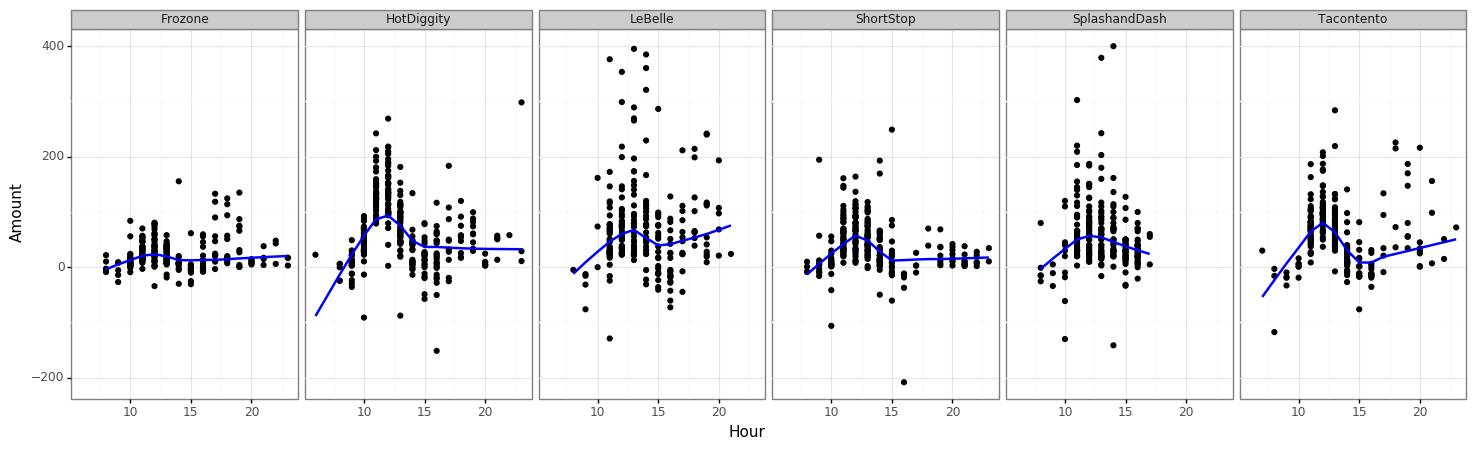

<ggplot: (288563695)>

In [8]:
# Plot the sales amount vs. time of day
plt.options.figure_size = (18, 4.8)
(ggplot(sales_hourly, aes(x='Hour', y='Amount')) +
 geom_point() +
 geom_smooth(color='blue') +
 facet_grid('. ~ Name') +
 labs(title='Transaction Amount vs Time of Day') +
 theme_bw())

This graphic show that not only to the number of transactions increase during the hours of 10:00 AM to 3:00 PM, the quality of those transactions tends to increase as well. This strengthens the recommendation for the company of choice to focus on those hours (use more employees to increase customer traffic, etc.).

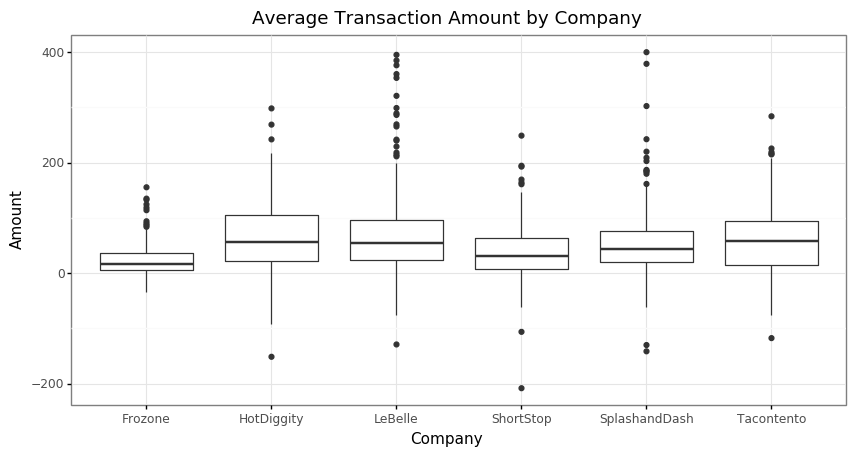

<ggplot: (-9223372036559774222)>

In [31]:
# Plot the companies vs. transaction amount
plt.options.figure_size = (10, 4.8)
(ggplot(sales_hourly, aes(x='Name', y='Amount')) +
 geom_boxplot() +
 labs(title='Average Transaction Amount by Company',
      x='Company') +
 theme_bw())

Here we see that LeBelle, HotDiggity, and Tacontento led the pack in terms of average transaction amounts. 

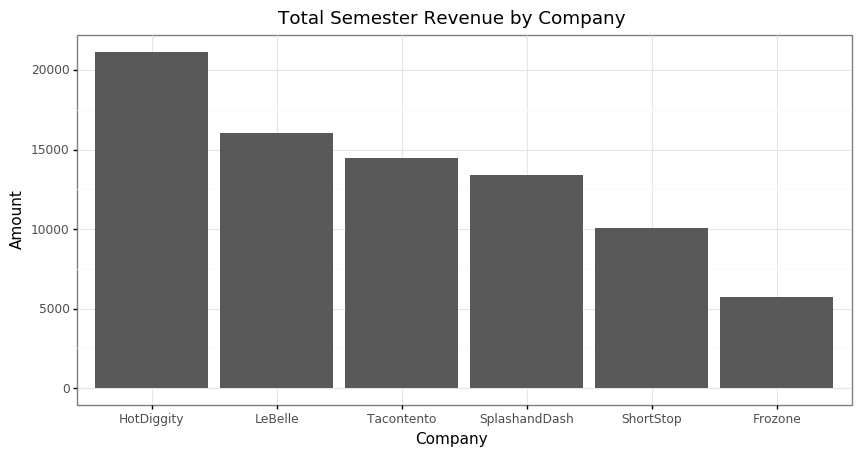

<ggplot: (-9223372036565062540)>

In [33]:
# A list of the companies in order of profit
ordered_by_profit = ['HotDiggity','LeBelle','Tacontento','SplashandDash','ShortStop','Frozone']

# Plot the sum of all transations for each company
sales_total = pd.DataFrame(sales_hourly.groupby(['Name'])['Amount'].sum()).reset_index()
(ggplot(sales_total, aes(x='Name', y='Amount')) +
 geom_col() +
 scale_x_discrete(limits=ordered_by_profit) +
 labs(title='Total Semester Revenue by Company',
      x='Company') +
 theme_bw())

Finally, we see that HotDiggity ended up with the highest revenue, and by a healthy margin, too. This company will be our final recommendation for investment. While LeBelle did have more high-end transactions, HotDiggity would be the safer bet because it had less variation in transaction amounts and a higher customer traffic flow. 